# AQI and Respiratory Death Rate Analysis
This notebook analyzes the relationship between AQI and respiratory death rate from 2000 to 2019 using data from Kaggle.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Setup
sns.set(style="whitegrid")


In [9]:
# Load data
df = pd.read_csv("AQI_Respiratory_2000_2019.csv", dtype={"year": str, "location_name": str})
df.shape, df.columns.tolist()


((43472, 20),
 ['FIPS,YEAR',
  'location_name',
  'fips',
  'year',
  'Resp Death Rate',
  'Days with AQI',
  'Good Days',
  'Moderate Days',
  'Unhealthy for Sensitive Groups Days',
  'Unhealthy Days',
  'Very Unhealthy Days',
  'Hazardous Days',
  'Max AQI',
  '90th Percentile AQI',
  'Median AQI',
  'Days CO',
  'Days NO2',
  'Days Ozone',
  'Days PM2_5',
  'Days PM10'])

In [10]:
# Drop NA and preview
data = df[['year', 'location_name', 'Resp Death Rate', 'Median AQI']].dropna()
data.head()


,year,location_name,Resp Death Rate,Median AQI
0,2000,Madison County (Alabama),0.000219,51.0
1,2000,Colbert County (Alabama),0.000354,63.0
2,2000,DeKalb County (Alabama),0.000317,54.0
3,2000,Lawrence County (Alabama),0.000314,54.0
4,2000,Morgan County (Alabama),0.000320,66.0


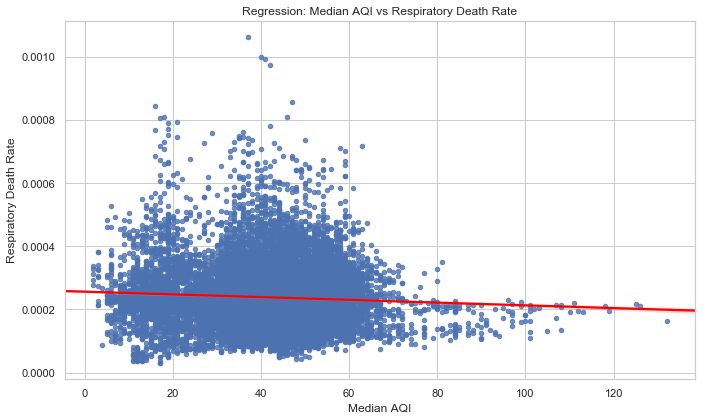

In [11]:
# Regression plot
plt.figure(figsize=(10,6))
sns.regplot(data=data, x='Median AQI', y='Resp Death Rate', scatter_kws={"s": 20}, line_kws={"color": "red"})
plt.title("Regression: Median AQI vs Respiratory Death Rate")
plt.xlabel("Median AQI")
plt.ylabel("Respiratory Death Rate")
plt.tight_layout()
plt.show()


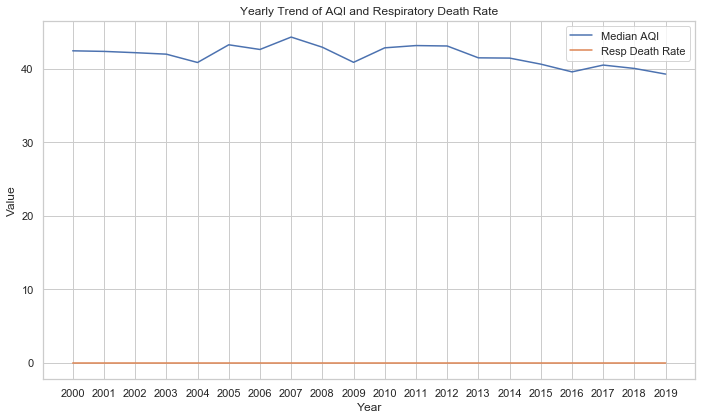

In [12]:
# Yearly trends
yearly_avg = data.groupby('year')[['Median AQI', 'Resp Death Rate']].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_avg, x='year', y='Median AQI', label='Median AQI')
sns.lineplot(data=yearly_avg, x='year', y='Resp Death Rate', label='Resp Death Rate')
plt.title("Yearly Trend of AQI and Respiratory Death Rate")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()


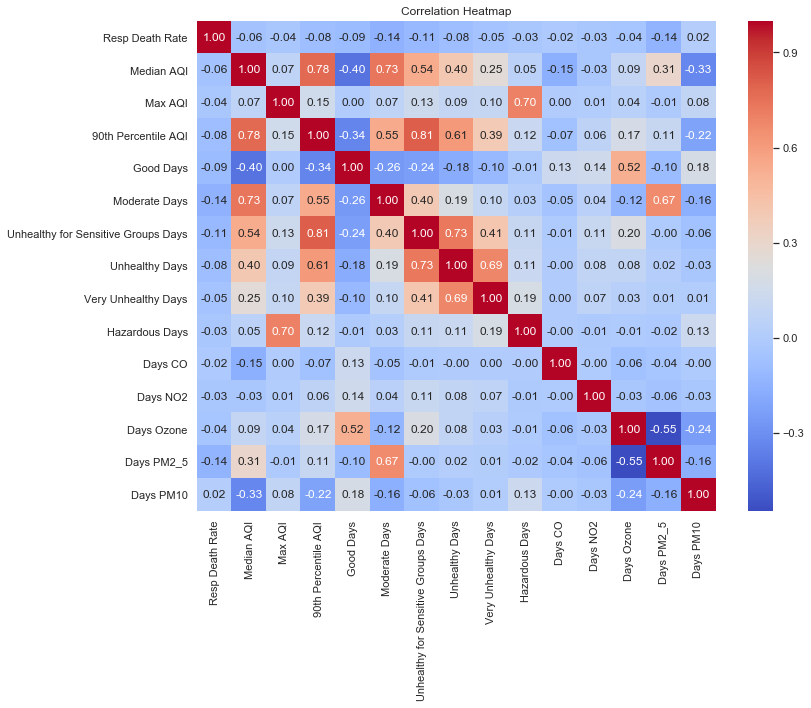

In [13]:
# Correlation heatmap
corr_columns = [
    'Resp Death Rate', 'Median AQI', 'Max AQI', '90th Percentile AQI',
    'Good Days', 'Moderate Days', 'Unhealthy for Sensitive Groups Days',
    'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days',
    'Days CO', 'Days NO2', 'Days Ozone', 'Days PM2_5', 'Days PM10'
]
corr_data = df[corr_columns].dropna()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


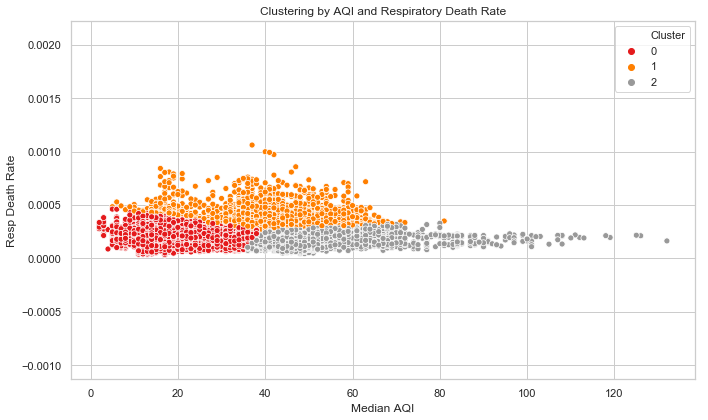

In [14]:
# Clustering
cluster_data = df[['Median AQI', 'Resp Death Rate']].dropna()
scaled = StandardScaler().fit_transform(cluster_data)
cluster_data['Cluster'] = KMeans(n_clusters=3, random_state=42).fit_predict(scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(data=cluster_data, x='Median AQI', y='Resp Death Rate', hue='Cluster', palette='Set1')
plt.title("Clustering by AQI and Respiratory Death Rate")
plt.tight_layout()
plt.show()


### Conclusion
- There appears to be a positive correlation between AQI and respiratory death rate.
- Trends over the years reveal varying patterns, possibly influenced by other environmental or policy factors.
- Clustering analysis suggests regional patterns worth deeper investigation.